In [2]:
import pandas as pd

# Wczytanie danych z pliku CSV
df = pd.read_csv('filtered_players_400_min.csv')

# Wyświetlenie pierwszych kilku wierszy, aby upewnić się, że dane są wczytane poprawnie
df.head()


,Player,Nation,Pos,Age,Squad,Comp,Born,Player Value,cost,league_new_club,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Brenden Aaronson,USA,MFFW,22,Leeds United,Premier League,2000,€25.00m,loan transfer,Bundesliga,...,0.17,2.54,0.51,0.0,0.00,0.0,4.86,0.34,1.19,22.2
1,Francesco Acerbi,ITA,DF,35,Inter,Serie A,1988,€4.00m,€4.00m,Serie A,...,0.08,0.24,0.57,0.0,0.00,0.0,4.96,2.76,1.63,63.0
2,Tyler Adams,USA,MF,23,Leeds United,Premier League,1999,€18.00m,€26.90m,Premier League,...,0.05,0.11,2.00,0.0,0.00,0.0,8.68,0.89,0.63,58.6
3,Álvaro Aguado,ESP,MF,26,Valladolid,La Liga,1996,€3.00m,-,NaN,...,0.00,2.22,0.48,0.0,0.08,0.0,5.71,0.95,1.03,48.0
4,Kevin Agudelo,COL,MFFW,24,Spezia,Serie A,1998,€3.00m,€2.50m,UAE Pro League,...,0.13,1.31,1.38,0.0,0.00,0.0,5.69,0.56,1.25,31.0


In [3]:
# Wyciągnięcie pierwszej pozycji
df['Primary_Pos'] = df['Pos'].apply(lambda x: x.split()[0][0])

# Mapowanie pozycji na kategorie
position_mapping = {
    'F': 'Napastnik',  # FW
    'M': 'Pomocnik',   # MF
    'D': 'Obrońca',    # DF
    'G': 'Bramkarz'    # GK
}
df['Category'] = df['Primary_Pos'].map(position_mapping)

# Sprawdzenie czy mapowanie jest poprawne
df[['Pos', 'Primary_Pos', 'Category']].head()


,Pos,Primary_Pos,Category
0,MFFW,M,Pomocnik
1,DF,D,Obrońca
2,MF,M,Pomocnik
3,MF,M,Pomocnik
4,MFFW,M,Pomocnik


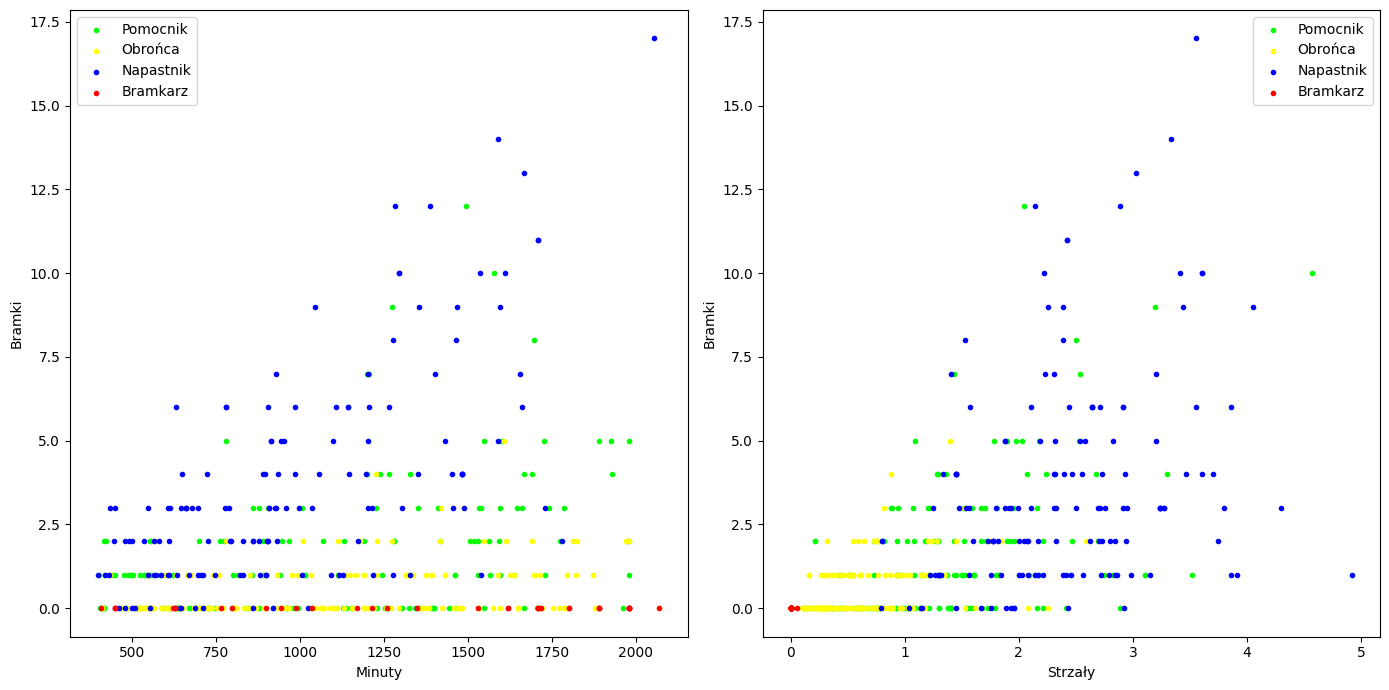

In [7]:
import matplotlib.pyplot as plt

# Kolory dla kategorii
colors = {
    'Napastnik': 'blue',
    'Pomocnik': 'lime',
    'Obrońca': 'yellow',
    'Bramkarz': 'red'
}

# Symbole dla kategorii
markers = {
    'Napastnik': '.',
    'Pomocnik': '.',
    'Obrońca': '.',
    'Bramkarz': '.'
}

# Funkcja do tworzenia wykresu punktowego
def plot_scatter(ax, x, y, xlabel, ylabel):
    for category in df['Category'].unique():
        subset = df[df['Category'] == category]
        ax.scatter(subset[x], subset[y], label=category, c=colors[category], marker=markers[category])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

# Tworzenie wykresów
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

plot_scatter(axs[0], 'Min', 'Goals', 'Minuty', 'Bramki')
plot_scatter(axs[1], 'Shots', 'Goals', 'Strzały', 'Bramki')

plt.tight_layout()
plt.show()


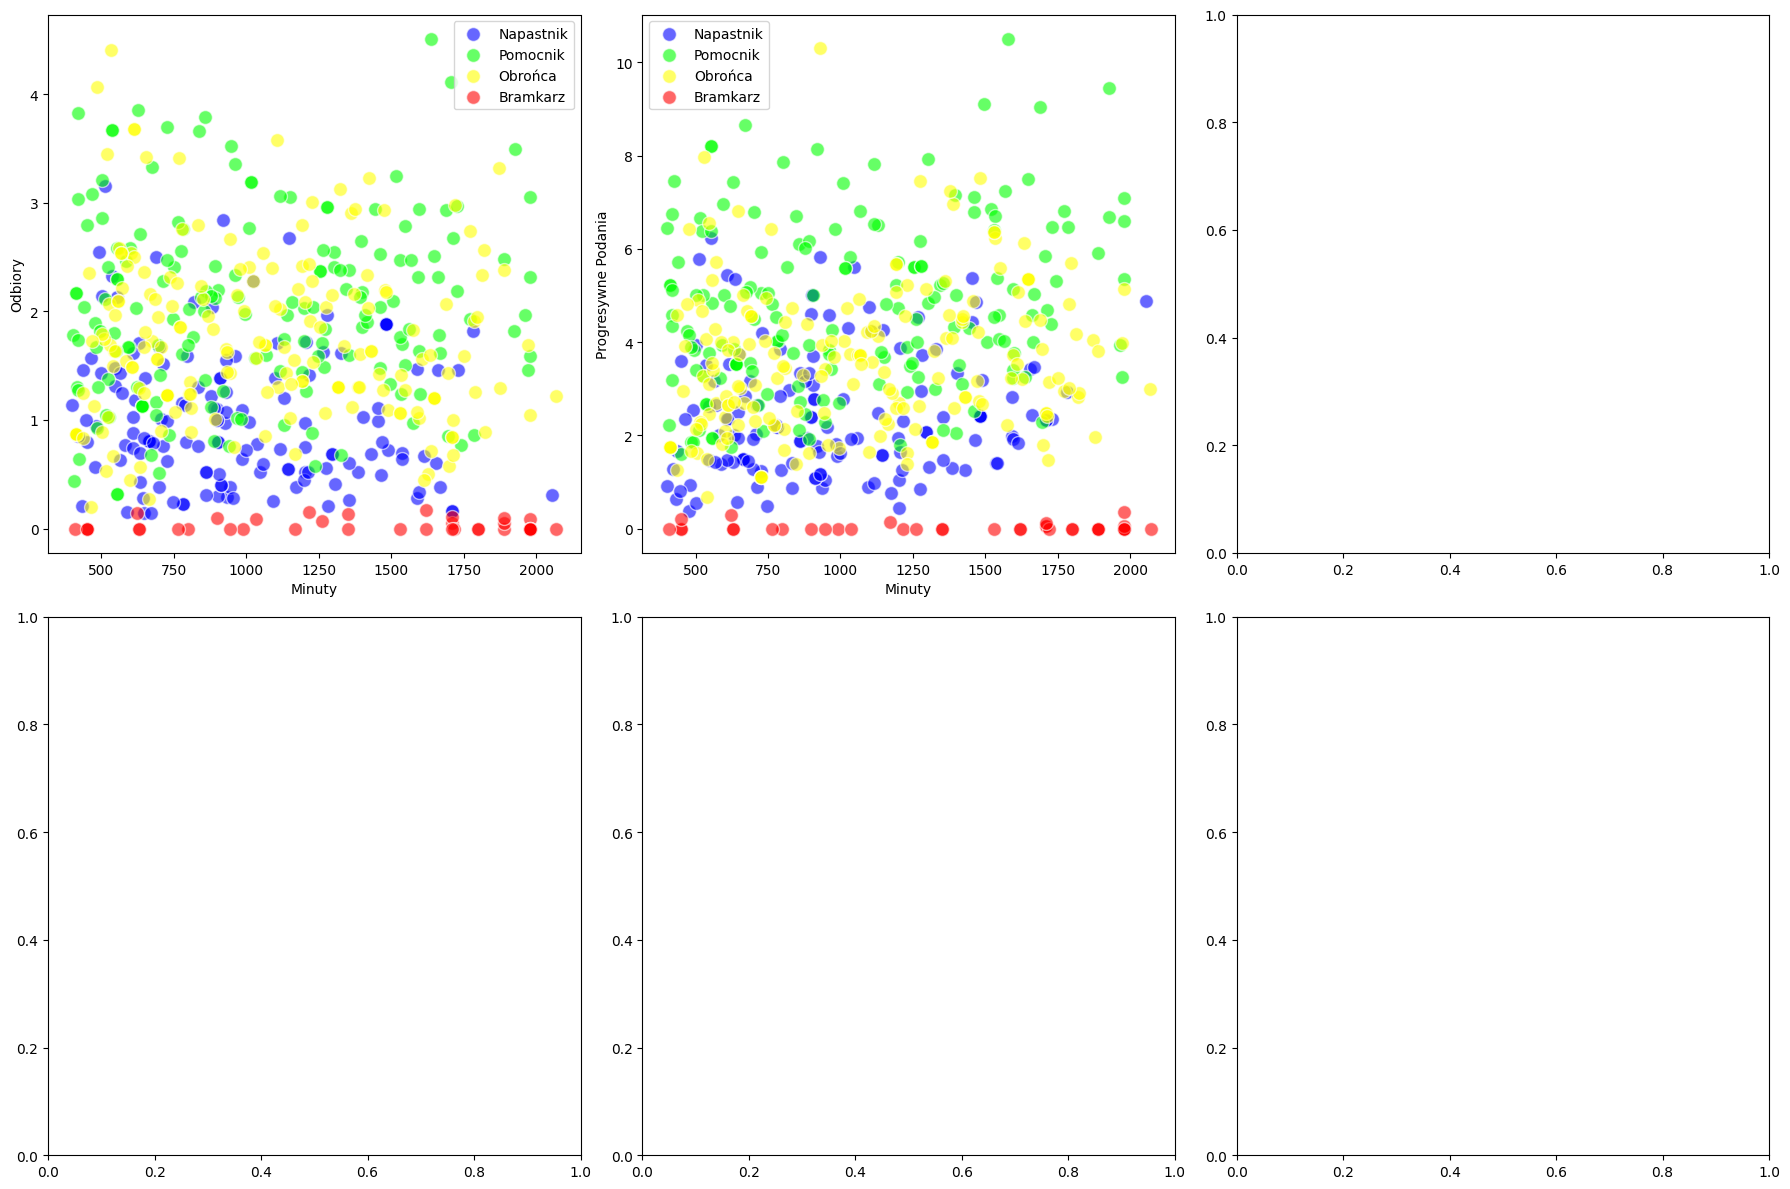

In [21]:
# Lista interesujących nas kolumn
columns_of_interest = ['Tkl', 'PasProg', 'Blk', 'Drib', 'SoT', 'SoT%']

# Funckja do tworzenia wykresu punktowego
def plot_scatter(ax, x, y, xlabel, ylabel, category_colors):
    for category, color in category_colors.items():
        subset = df[df['Category'] == category]
        ax.scatter(subset[x], subset[y], c=color, label=category, alpha=0.6, edgecolors='w', s=100)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

# Tworzenie wykresów
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

plot_scatter(axs[0, 0], 'Min', 'Tkl', 'Minuty', 'Odbiory', colors)
plot_scatter(axs[0, 1], 'Min', 'PasProg', 'Minuty', 'Progresywne Podania', colors)

plt.tight_layout()
plt.show()